In [16]:
%matplotlib inline
import pandas as pd
import statsmodels.api as sm
import math


loansData_clean = pd.read_csv('loansData_clean.csv')

b = lambda x: 1 if x >= 0.12 else 0
loansData_clean['IR_TF'] = loansData_clean['Interest.Rate'].map(b)
loansData_clean['Intercept'] = 1

ind_vars = ['Amount.Requested', 'FICO.Score', 'Intercept']

logit = sm.Logit(loansData_clean['IR_TF'], loansData_clean[ind_vars])

result = logit.fit()

coeff = result.params

print coeff
print 

def logistic_function(x, y, z):
    p = (1/(1 + math.e**(1 + x[1]*y + x[0]*z)))
    print 'p = {}'.format(p)
    if p >= 0.7:
        return 'Denied'
    else:
        return 'Approved'

logistic_function(coeff, 720, 10000)

Optimization terminated successfully.
         Current function value: 0.319503
         Iterations 8
Amount.Requested     0.000174
FICO.Score          -0.087423
Intercept           60.125045
dtype: float64

p = 1.0


'Denied'

In [7]:
cols = ['IR_TF','Interest.Rate','Amount.Requested','FICO.Score']
loansData_clean[cols].head()

,IR_TF,Interest.Rate,Amount.Requested,FICO.Score
0,0,0.0890,20000,735
1,1,0.1212,19200,715
2,1,0.2198,35000,690
3,0,0.0999,10000,695
4,0,0.1171,12000,695


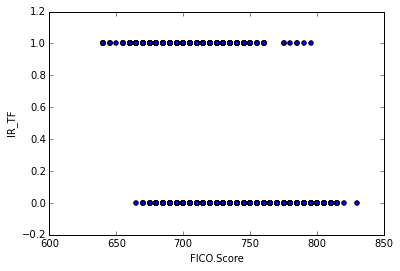

In [10]:
loansData_clean.plot(kind='scatter',x='FICO.Score', y='IR_TF')